In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import RocCurveDisplay

## Loading the Data

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Looking at Basic Descriptors of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Plotting Passanger Class, Fare Amount and Sex

<Axes: xlabel='Pclass', ylabel='Fare'>

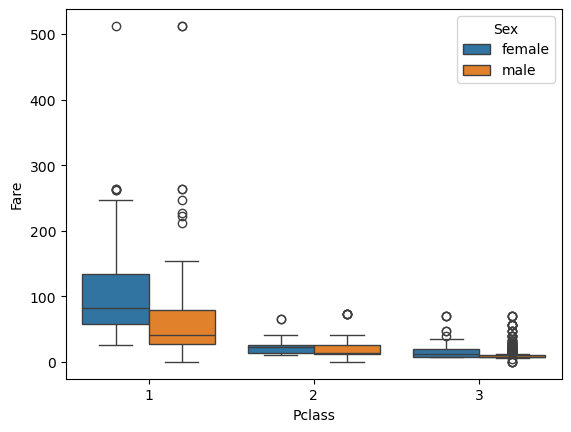

In [5]:
sns.boxplot(df, x="Pclass", y="Fare", hue="Sex")

<Axes: xlabel='Age', ylabel='Fare'>

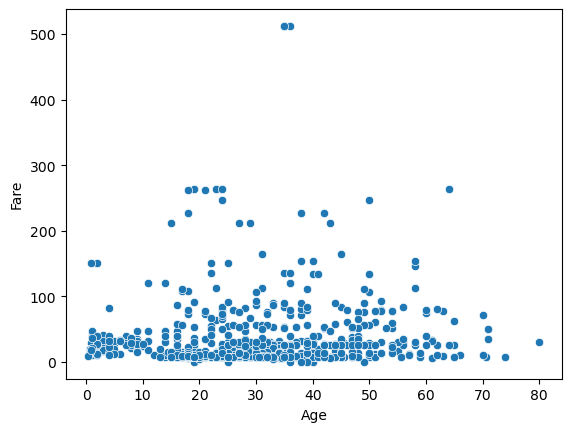

In [6]:
sns.scatterplot(df, x="Age", y="Fare")

## Fare Transformation

The `Fare` feature looks like it should be on a logarithmic scale.

In [7]:
df["LogFare"] = np.log(1 + df["Fare"].values)

## Replotting with the Transformed Fare Data

<Axes: xlabel='Pclass', ylabel='LogFare'>

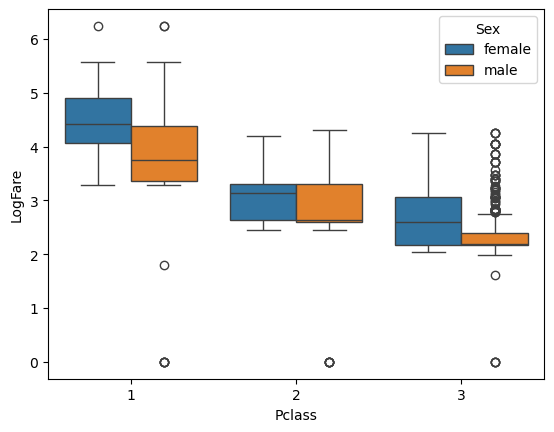

In [8]:
sns.boxplot(df, x="Pclass", y="LogFare", hue="Sex")

<Axes: xlabel='Age', ylabel='LogFare'>

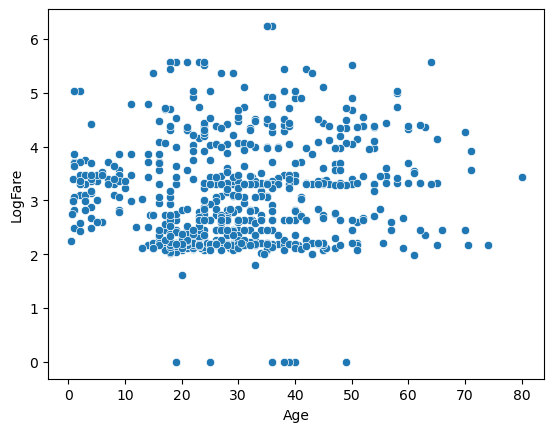

In [9]:
sns.scatterplot(df, x="Age", y="LogFare")

## Effect of Sex on Survival

<Axes: xlabel='Sex', ylabel='count'>

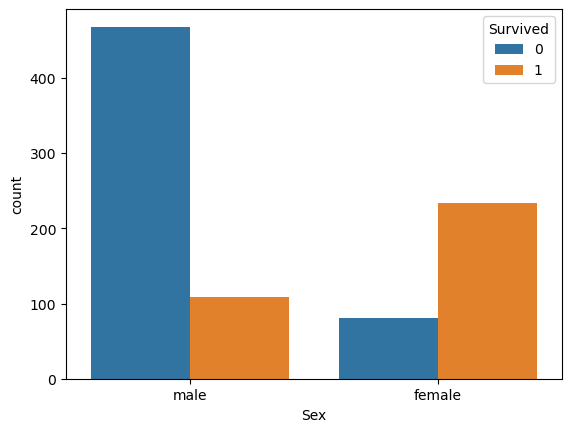

In [10]:
sns.countplot(df, x="Sex", hue="Survived")

In [11]:
pd.crosstab(df["Survived"], df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


## Effect of Parch on Survival

The `Parch` feature denotes the No. of parents / children aboard the Titanic.

<Axes: xlabel='Parch', ylabel='count'>

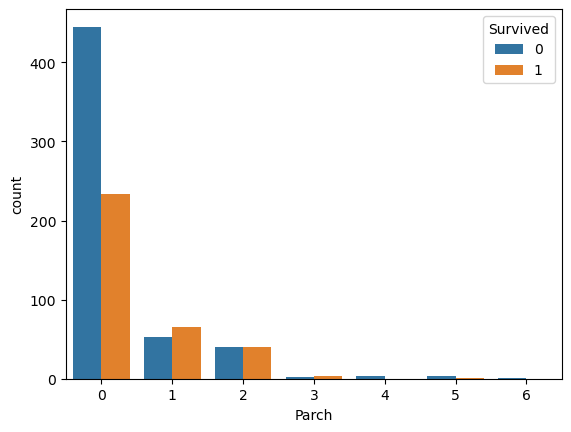

In [12]:
sns.countplot(df, x="Parch", hue="Survived")

In [13]:
pd.crosstab(df["Survived"], df["Parch"])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


## Effect of SibSp on Survival

The `SibSp` feature denotes the No. of siblings / spouses aboard the Titanic.

<Axes: xlabel='SibSp', ylabel='count'>

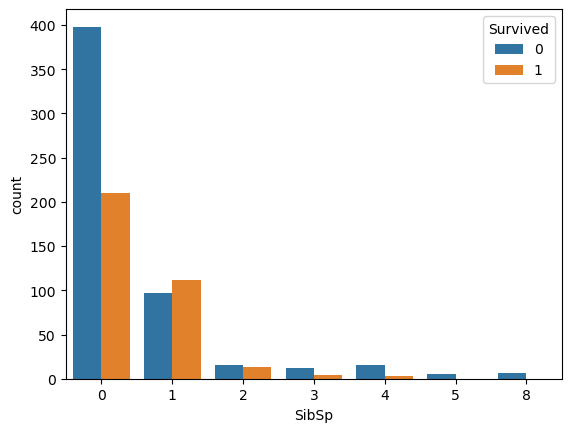

In [14]:
sns.countplot(df, x="SibSp", hue="Survived")

In [15]:
pd.crosstab(df["Survived"], df["SibSp"])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


## Exploring Connections Between Sex/Parch, Sex/SibSp and Parch/SibSp

In [20]:
pd.crosstab(df["Sex"], df["SibSp"])

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4


In [21]:
pd.crosstab(df["Sex"], df["Parch"])

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,194,60,49,4,2,4,1
male,484,58,31,1,2,1,0


In [22]:
pd.crosstab(df["Parch"], df["SibSp"])

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,537,123,16,2,0,0,0
1,38,57,7,7,9,0,0
2,29,19,4,7,9,5,7
3,1,3,1,0,0,0,0
4,1,3,0,0,0,0,0
5,2,3,0,0,0,0,0
6,0,1,0,0,0,0,0


## Age and LogFare Pairplots

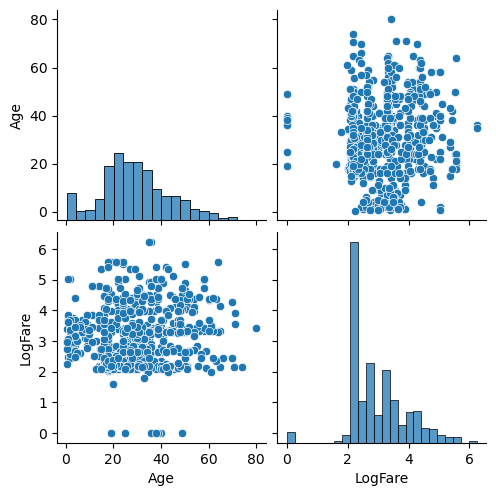

In [16]:
sns.pairplot(df[["Age", "LogFare"]])

## Correlation Calculation Between Age and LogFare

The `Age` feature contains `NaN` values, which should be replaced by something. Here, I chose the dataset mean.

In [17]:
spearmanr(df["Age"].fillna(df["Age"].mean()), df["LogFare"])

SignificanceResult(statistic=np.float64(0.11884708066033668), pvalue=np.float64(0.0003777382373651246))

## Continuous Values as Predictors of Survival

The ROC-AUC value helps to investigate whether a continuous feature is a good indicator for survival.

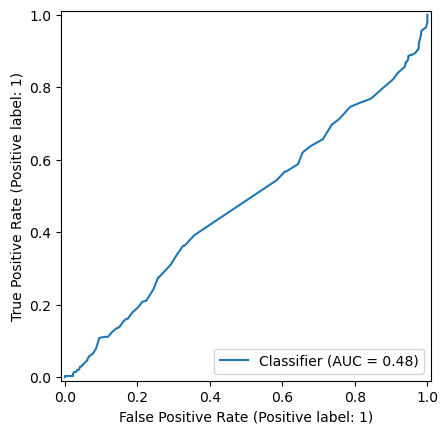

In [18]:
RocCurveDisplay.from_predictions(df["Survived"], df["Age"].fillna(df["Age"].mean()))

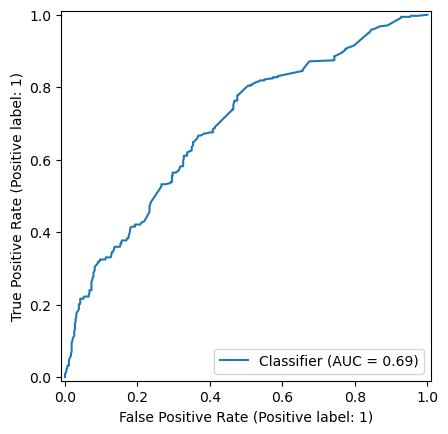

In [19]:
RocCurveDisplay.from_predictions(df["Survived"], df["LogFare"])